# Entregável 1 - visão computacional

### Carlos Dip

In [35]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.1.1 


# Equalização de histograma

In [36]:
rintin = cv2.imread("RinTinTin.jpg")

In [37]:
rintin.shape

(240, 320, 3)

In [38]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [39]:
rintin_gray.shape

(240, 320)

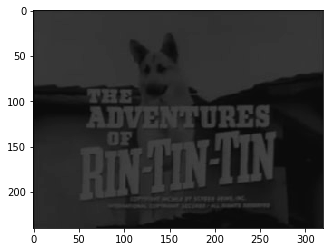

In [40]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

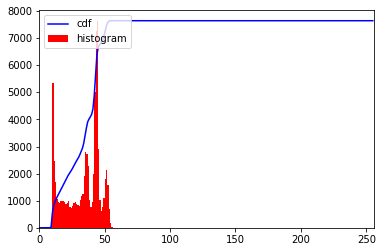

In [41]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

In [52]:
# 1. Não. A imagem faz uso do intervalo [8,58], ao invés do intervalo [0,255] que maximizaria o contraste na imagem.

iMax, iMin = rintin_gray.flatten().max(), rintin_gray.flatten().min()
rintin_gray_saturized = (rintin_gray-iMin)*int(255/(iMax-iMin)) # Interpolação
plt.imsave("RinTinEqualized.jpg", rintin_gray_saturized)

In [ ]:
plt.imshow(np.array(rintin_gray_saturized), cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


In [ ]:
cena_orig = cv2.imread("cena_canto_sala.jpg")
cena_orig = cv2.cvtColor(cena_orig, cv2.COLOR_BGR2RGB)
cena_out = cena_orig.copy()
cena_out[:] = 0
plt.imshow(cena_orig)

In [ ]:
cena_orig.shape

In [ ]:
cena_blue = cena_orig[:,:,2]
cena_green = cena_orig[:,:,1]
cena_red = cena_orig[:,:,0]

hist,bins = np.histogram(cena_red.flatten(),256,[0,256])
plt.hist(cena_red.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Cena Vermelho")
plt.show()


Neste histograma, podemos entender que a região mais larga de vermelho com pico em 190/195, é a parede amarela (grande percentual de área), assim restam dois picos, sendo que o da direita deve ser o da caixa, pois é mais intenso.

In [ ]:
hist,bins = np.histogram(cena_blue.flatten(),256,[0,256])
plt.hist(cena_blue.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Cena Azul")
plt.show()

No histograma acima, podemos identificar um grande pico de azul próximo de 220, que certamente representa o creeper azul.

In [ ]:
# hist,bins = np.histogram(cena_green.flatten(),256,[0,256])
# plt.hist(cena_green.flatten(),256,[0,256], color = 'r')
# plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
# plt.title("Cena Verde")
# plt.show()

In [ ]:
w, h, c = cena_orig.shape
for i in range(w):
    for j in range(h):
        r, g, b = cena_orig[i][j] # Separa as cores em variáveis
        if b < 20 and r > 210:
            cena_out[i][j] = 255
        else: 
            cena_out[i][j] = 0
        
plt.imshow(cena_out)

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [ ]:
bat_orig = cv2.imread("hall_box_battery_atividade3.png")
bat_orig = cv2.cvtColor(bat_orig, cv2.COLOR_BGR2GRAY)
plt.imshow(bat_orig, cmap='Greys_r', vmin=0, vmax=255)
bat_out = bat_orig.copy()

In [ ]:
w, h = bat_orig.shape
for i in range(1, w-1):
    for j in range(h):
        bat_out[i][j] = min(bat_orig[i+1][j]-bat_orig[i-1][j], bat_orig[i-1][j]-bat_orig[i+1][j])

plt.imshow(bat_out, cmap="Greys_r", vmin=0, vmax=255)